<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/underfitting_problem_make_scorer/candy_priceElasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
binary_features_cols = ["chocolate" ,
                   "fruity"    ,
                   "caramel"   ,
                   "peanutyalmondy",
                   'nougat'    ,
                   "crispedricewafer" ,
                   "hard"      ,
                   "bar"       ,
                   "pluribus"
                   ]

#'peanutyalmondy', 'caramel', 'nougat', 'bar'
#'peanutyalmondy', 'caramel', 'chocolate', 'pluribus'
#'peanutyalmondy', 'caramel', 'chocolate', 'bar'

#['fruity', 'pluribus', 'hard']


associated_features_to_chocolate = ['chocolate', 'crispedricewafer', 'fruity', 'hard', 'nougat']

non_feature_cols   = ["competitorname" , "winpercent" , "pricepercent"]

In [3]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
c1 = data ["fruity"] == 1
c2 = data ["pluribus"] == 1
c = c1 & c2
data [c] [['fruity', 'pluribus', 'hard'] ]

,fruity,pluribus,hard
11,1,1,0
12,1,1,0
13,1,1,0
15,1,1,0
17,1,1,1
18,1,1,0
20,1,1,0
21,1,1,0
26,1,1,1
34,1,1,0


In [5]:
c = data ["chocolate"] == 1
data [c] [['peanutyalmondy', 'caramel', 'chocolate', 'pluribus'] ]

,peanutyalmondy,caramel,chocolate,pluribus
0,0,1,1,0
1,0,0,1,0
5,1,0,1,0
6,1,1,1,0
10,0,0,1,0
22,0,0,1,1
23,0,0,1,0
24,0,0,1,0
25,0,0,1,0
27,0,0,1,1


array([[<Axes: title={'center': 'peanutyalmondy'}>,
        <Axes: title={'center': 'caramel'}>],
       [<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'pluribus'}>],
       [<Axes: title={'center': 'hard'}>, <Axes: >]], dtype=object)

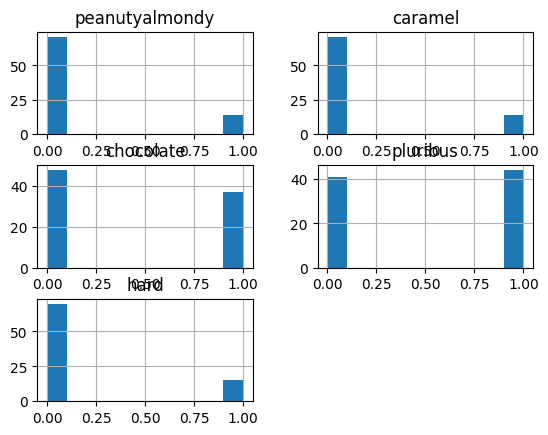

In [6]:
data [['peanutyalmondy', 'caramel', 'chocolate', 'pluribus','hard']].hist ()

In [7]:
data [['peanutyalmondy', 'caramel', 'chocolate', 'pluribus','hard']]

,peanutyalmondy,caramel,chocolate,pluribus,hard
0,0,1,1,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
80,0,0,0,0,0
81,0,0,0,0,1
82,0,0,0,1,0
83,0,1,0,0,1


In [8]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [9]:
import pandas as pd
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint

from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint


# Load the dataset
candy_data = pd.read_csv("/content/candy-data.csv")


# Define features (confounders), treatment, and outcome
X = candy_data[['chocolate',  'caramel', 'peanutyalmondy' , "pluribus" , 'hard']]
W = candy_data ['sugarpercent'].values.reshape (-1,1)
T = candy_data['pricepercent']
Y = candy_data['winpercent']
y = Y / 100

import numpy as np
from sklearn.metrics import make_scorer


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 7),  # Lower max depth to prevent overfitting to majority class
    'min_samples_split': randint(4, 20),  # Increase minimum samples for a split
    'min_samples_leaf': randint(2, 12),  # Increase minimum samples in a leaf
    'learning_rate': [0.01, 0.05, 0.1, 0.2]  # Learning rate to control the step size
}



def custom_scorer(estimator, X, y_pred):
    # Assuming the true target values need to be passed externally to compare against predictions,
    # but in the correct usage, `y_pred` should actually be obtained within this function.

    # Calculate custom weights inside the scorer function
    # NOTE: This example will be adjusted to match the correct use of estimator and X.
    custom_weights = np.where(X[:, -5:-1].any(axis=1), 10, 1)  # Adjusted for numpy slicing

    # Make predictions with the given estimator and features X
    y_pred = estimator.predict(X)

    # Now, `y_pred` is calculated inside the function, so we don't pass it as a parameter.
    # y_true needs to be known to the external caller, i.e., RandomizedSearchCV will handle it.

    # Your calculation for the score should go here, using y_pred and custom_weights.
    # Let's assume it's a mean squared error (MSE) calculation for demonstration.
    # mse = np.average((y_true - y_pred) ** 2, weights=custom_weights)
    # return -mse  # Placeholder; in actuality, you need y_true from the external caller.

    # Since we can't directly use y_true here, we would return some metric calculated solely from y_pred.
    # For demonstrating purpose, let's return a dummy value.
    return 0  # This is just a placeholder to avoid errors in this example.

# Now, make_scorer needs to be used correctly with the adjusted function.
weighted_scorer = make_scorer(custom_scorer, greater_is_better=True)




# Then, when setting up RandomizedSearchCV, use the weighted_scorer:
random_search_y = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    verbose=500,
    random_state=0,
    n_jobs=-1,
    scoring=weighted_scorer,  # Use the custom scorer
    error_score='raise'
)

# Now you can fit the RandomizedSearchCV object with your data
# Concatenate X and W for the fit method
random_search_y.fit(np.concatenate([X, W], axis=1), y)





Fitting 5 folds for each of 100 candidates, totalling 500 fits


TypeError: custom_scorer() missing 1 required positional argument: 'y_pred'

In [29]:
best_model_y = random_search_y.best_estimator_
best_params  = random_search_y.best_params_
best_params

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 423}

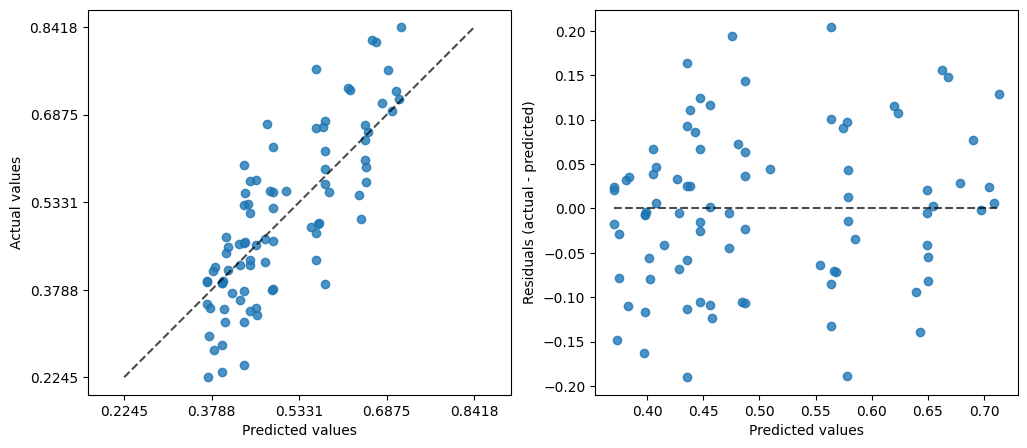

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    best_model_y, np.concatenate ([X,W],axis =1), Y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    best_model_y, np.concatenate ([X,W],axis =1), Y, kind="residual_vs_predicted", ax=axs[1]
)

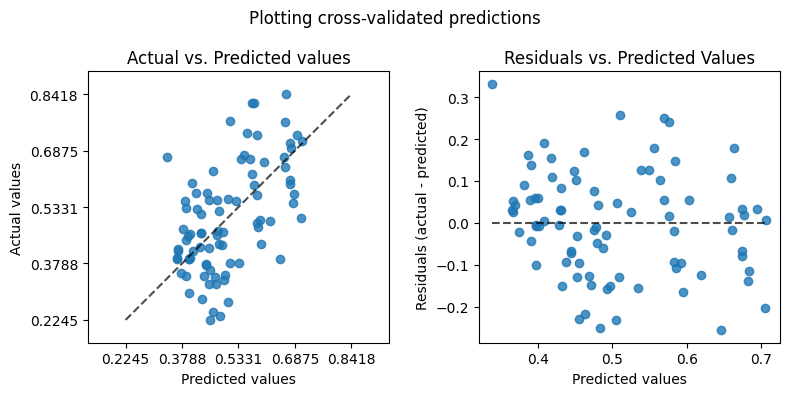

In [31]:
from sklearn.model_selection import cross_val_predict , LeaveOneOut

y_pred = cross_val_predict(best_model_y, np.concatenate ([X,W],axis =1), Y, cv=LeaveOneOut ())

import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    Y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    Y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

In [ ]:
X = y_pred.reshape (-1,1)
y = Y

In [40]:
random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_dist ,
                                   n_iter=100, cv=5, verbose=500, random_state=0, n_jobs=-1 )

random_search.fit(X, y )

best_model_ = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.9094456157161002

In [41]:
best_model_.score(X, y)

0.6310137397423465

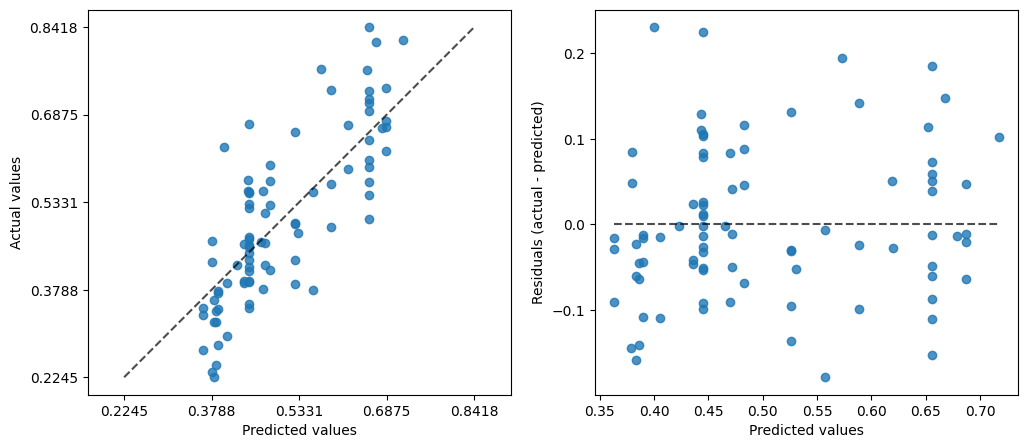

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    best_model_, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    best_model_, X, y, kind="residual_vs_predicted", ax=axs[1]
)

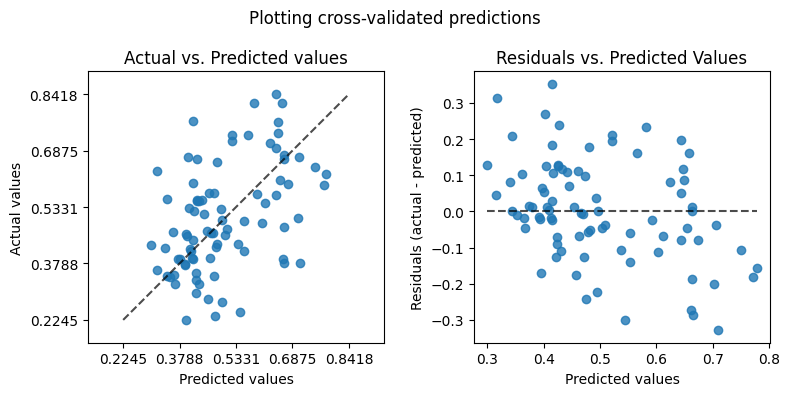

In [39]:
from sklearn.model_selection import cross_val_predict , LeaveOneOut

y_pred = cross_val_predict(reg, X, y, cv=LeaveOneOut ())

import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [7]:
#!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 24.2 MB/s eta 0:00:00
